# Linear Regression:

Linear regression is a statistical approach that models the relationship between input features and output. The input features are called the independent variables, and the output is called a dependent variable. Our goal here is to predict the value of the output based on the input features by multiplying it with its optimal coefficients.

Some real-life examples of linear regression :

(1) To predict sales of products.                                   
(2) To predict economic growth.                      
(3) To predict petroleum prices.                 
(4) To predict the emission of a new car.               
(5) Impact of GPA on college admissions.               
There are two types of linear regression :                   
1: Simple Linear Regression                    
2: Multivariable Linear Regression                  

1.1: Simple Linear Regression:

In simple linear regression, we predict the output/dependent variable based on only one input feature. The simple linear regression is given by:

            Y = b0 + b1*X1
                or
            Y = m*X + c

where,                                                            
                c or b0 = constant or y-intercept of line                                                                  
                m or b1 = coefficent of input feture                                                                          
                X or X1 = input feture on which output is based                                                     
                Y = Output                                                                      



Below we are going to implement simple linear regression using the sklearn library in Python.
Step by step implementation in Python:
a. Import required libraries:
Since we are going to use various libraries for calculations, we need to import them.

Step by step implementation 
import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
from sklearn import linear_model

In [4]:
# read csv file

data = pd.read_csv("D:/CSV_Data/CO2_Emissions.csv")
data.head()

,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Select the features we want to consider in predicting values

Here our goal is to predict the value of “co2 emissions” from the value of “engine size” in our dataset.

In [5]:
data = data[['Engine Size', 'CO2 Emissions']]

In [6]:
data

,Engine Size,CO2 Emissions
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
...,...,...
7380,2.0,219
7381,2.0,232
7382,2.0,240
7383,2.0,232


# We can visualize our data on a scatter plot.


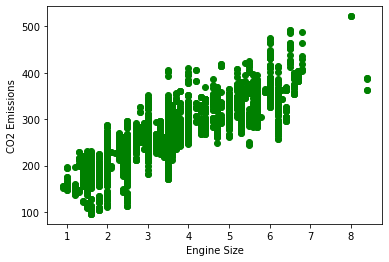

In [8]:
# Engine size vs co2 emissions graph

plt.scatter(data['Engine Size'], data['CO2 Emissions'], color = 'green')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

# Divide the data into training and testing data:

In [9]:
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]


In [10]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

train_x = np.array(train[['Engine Size']])
train_y = np.array(train[['CO2 Emissions']])

reg.fit(train_x, train_y)

# The coefficents:
print("Coefficents :",reg.coef_)
print("Intercept :",reg.intercept_)

Coefficents : [[36.42651712]]
Intercept : [134.95907073]


# Plot the best fit line:

Based on the coefficients, we can plot the best fit line for our dataset.

Text(0, 0.5, 'CO2 Emissions')

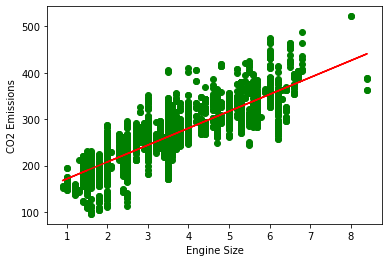

In [12]:
# ploting regression line

plt.scatter(train['Engine Size'], train['CO2 Emissions'], color = 'green')
plt.plot(train_x, reg.coef_*train_x + reg.intercept_, '-r')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')

# Prediction function:

In [16]:
#We are going to use a prediction function for our testing dataset.

# Predecting values

# function for predicting values

def get_reg_pred(input_features, intercept, slop):
    predicted_values = input_features*slop + intercept
    
    return predicted_values

# Predicting co2 emissions:

In [17]:
#Predicting the values of co2 emissions based on the regression line.

# predicting emissions for future car

my_engine_size = 3.5

estimated_emission = get_reg_pred(my_engine_size, reg.intercept_[0], reg.coef_[0][0])
print("Estimated emission : ",estimated_emission)

Estimated emission :  262.45188064061153


# Checking accuracy for test data 

We can check the accuracy of a model by comparing the actual values with the predicted values in our dataset.

In [20]:
# checking various accuracy

from sklearn.metrics import r2_score

test_x = np.array(test[['Engine Size']])
test_y = np.array(test[['CO2 Emissions']])
test_z = reg.predict(test_x)

print("Mean absolute error : %.2f" % np.mean(np.absolute(test_z - test_y)))
print("Mean sum of squares (MSE): %.2f" % np.mean((test_z - test_y)**2))
print("R2-Score: %.2f" % r2_score(test_z, test_y))

Mean absolute error : 24.60
Mean sum of squares (MSE): 1070.40
R2-Score: 0.51


In [22]:
print("Mean absolute error : {}".format(np.mean(np.absolute(test_z - test_y))))
print("Mean sum of squares (MSE): {}".format(np.mean((test_z - test_y)**2)))
print("R2-Score: {}" .format(r2_score(test_z, test_y)))

Mean absolute error : 24.597906473827365
Mean sum of squares (MSE): 1070.396798799217
R2-Score: 0.5143146341103968
